## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.070220 -0.343220 -1.556535 -1.056155 -0.525881 -0.248178
1  1.063329  1.999469 -1.027367  1.717187 -1.267685  1.113581
2 -1.312223  1.043816 -0.983817  1.481716 -0.792281  0.029316
3 -1.116930 -0.647024  1.558959  1.694709 -1.655278  0.193644
4  1.272428 -1.300068  0.705234 -1.794603 -1.600679 -2.176141


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9449442	total: 56.5ms	remaining: 56.4s
1:	learn: 0.9346377	total: 57.2ms	remaining: 28.5s
2:	learn: 0.9256700	total: 57.7ms	remaining: 19.2s
3:	learn: 0.9167633	total: 58.2ms	remaining: 14.5s
4:	learn: 0.9075275	total: 58.8ms	remaining: 11.7s
5:	learn: 0.8989786	total: 59.3ms	remaining: 9.83s
6:	learn: 0.8893601	total: 60.1ms	remaining: 8.53s
7:	learn: 0.8811554	total: 60.8ms	remaining: 7.54s
8:	learn: 0.8724342	total: 61.5ms	remaining: 6.78s
9:	learn: 0.8645933	total: 62.1ms	remaining: 6.15s
10:	learn: 0.8560028	total: 62.7ms	remaining: 5.63s
11:	learn: 0.8472960	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8384390	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8297234	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8212729	total: 65.1ms	remaining: 4.28s
15:	learn: 0.8127712	total: 65.5ms	remaining: 4.03s
16:	learn: 0.8050923	total: 66ms	remaining: 3.82s
17:	learn: 0.7982472	total: 66.5ms	remaining: 3.63s
18:	learn: 0.7908791	total: 66.9ms	remaining: 

84:	learn: 0.4440515	total: 102ms	remaining: 1.09s
85:	learn: 0.4403595	total: 102ms	remaining: 1.08s
86:	learn: 0.4366232	total: 102ms	remaining: 1.07s
87:	learn: 0.4328474	total: 103ms	remaining: 1.07s
88:	learn: 0.4294769	total: 103ms	remaining: 1.06s
89:	learn: 0.4268444	total: 104ms	remaining: 1.05s
90:	learn: 0.4231575	total: 104ms	remaining: 1.04s
91:	learn: 0.4195228	total: 105ms	remaining: 1.03s
92:	learn: 0.4163833	total: 105ms	remaining: 1.03s
93:	learn: 0.4132388	total: 106ms	remaining: 1.02s
94:	learn: 0.4106109	total: 107ms	remaining: 1.01s
95:	learn: 0.4076096	total: 107ms	remaining: 1.01s
96:	learn: 0.4049692	total: 107ms	remaining: 1s
97:	learn: 0.4022402	total: 108ms	remaining: 994ms
98:	learn: 0.3991563	total: 109ms	remaining: 989ms
99:	learn: 0.3962119	total: 109ms	remaining: 983ms
100:	learn: 0.3932675	total: 110ms	remaining: 978ms
101:	learn: 0.3903423	total: 110ms	remaining: 970ms
102:	learn: 0.3873837	total: 111ms	remaining: 963ms
103:	learn: 0.3846911	total: 11

256:	learn: 0.1449805	total: 185ms	remaining: 536ms
257:	learn: 0.1441451	total: 186ms	remaining: 536ms
258:	learn: 0.1432709	total: 187ms	remaining: 535ms
259:	learn: 0.1423131	total: 187ms	remaining: 533ms
260:	learn: 0.1416424	total: 188ms	remaining: 532ms
261:	learn: 0.1405465	total: 188ms	remaining: 530ms
262:	learn: 0.1394738	total: 189ms	remaining: 529ms
263:	learn: 0.1385012	total: 189ms	remaining: 527ms
264:	learn: 0.1378531	total: 190ms	remaining: 526ms
265:	learn: 0.1371168	total: 190ms	remaining: 525ms
266:	learn: 0.1364149	total: 191ms	remaining: 523ms
267:	learn: 0.1357603	total: 191ms	remaining: 522ms
268:	learn: 0.1350381	total: 191ms	remaining: 520ms
269:	learn: 0.1339887	total: 192ms	remaining: 519ms
270:	learn: 0.1334195	total: 193ms	remaining: 518ms
271:	learn: 0.1325111	total: 193ms	remaining: 517ms
272:	learn: 0.1315614	total: 193ms	remaining: 515ms
273:	learn: 0.1308270	total: 194ms	remaining: 514ms
274:	learn: 0.1299709	total: 194ms	remaining: 512ms
275:	learn: 

453:	learn: 0.0512454	total: 283ms	remaining: 341ms
454:	learn: 0.0511438	total: 284ms	remaining: 340ms
455:	learn: 0.0508575	total: 284ms	remaining: 339ms
456:	learn: 0.0506029	total: 285ms	remaining: 339ms
457:	learn: 0.0504012	total: 285ms	remaining: 338ms
458:	learn: 0.0502054	total: 286ms	remaining: 337ms
459:	learn: 0.0500104	total: 286ms	remaining: 336ms
460:	learn: 0.0499057	total: 286ms	remaining: 335ms
461:	learn: 0.0498182	total: 287ms	remaining: 334ms
462:	learn: 0.0497320	total: 288ms	remaining: 334ms
463:	learn: 0.0495653	total: 288ms	remaining: 333ms
464:	learn: 0.0494810	total: 289ms	remaining: 332ms
465:	learn: 0.0492449	total: 289ms	remaining: 332ms
466:	learn: 0.0491216	total: 290ms	remaining: 331ms
467:	learn: 0.0489347	total: 291ms	remaining: 330ms
468:	learn: 0.0487040	total: 291ms	remaining: 329ms
469:	learn: 0.0486059	total: 291ms	remaining: 329ms
470:	learn: 0.0485158	total: 292ms	remaining: 328ms
471:	learn: 0.0482898	total: 292ms	remaining: 327ms
472:	learn: 

627:	learn: 0.0274895	total: 368ms	remaining: 218ms
628:	learn: 0.0274126	total: 368ms	remaining: 217ms
629:	learn: 0.0273083	total: 369ms	remaining: 217ms
630:	learn: 0.0271594	total: 370ms	remaining: 216ms
631:	learn: 0.0270692	total: 370ms	remaining: 215ms
632:	learn: 0.0269606	total: 371ms	remaining: 215ms
633:	learn: 0.0268792	total: 371ms	remaining: 214ms
634:	learn: 0.0267484	total: 371ms	remaining: 214ms
635:	learn: 0.0266059	total: 372ms	remaining: 213ms
636:	learn: 0.0265007	total: 372ms	remaining: 212ms
637:	learn: 0.0263907	total: 373ms	remaining: 212ms
638:	learn: 0.0263043	total: 373ms	remaining: 211ms
639:	learn: 0.0262008	total: 374ms	remaining: 210ms
640:	learn: 0.0261272	total: 374ms	remaining: 210ms
641:	learn: 0.0260884	total: 375ms	remaining: 209ms
642:	learn: 0.0260105	total: 375ms	remaining: 208ms
643:	learn: 0.0258846	total: 375ms	remaining: 208ms
644:	learn: 0.0257796	total: 376ms	remaining: 207ms
645:	learn: 0.0257080	total: 376ms	remaining: 206ms
646:	learn: 

818:	learn: 0.0137009	total: 464ms	remaining: 103ms
819:	learn: 0.0136507	total: 465ms	remaining: 102ms
820:	learn: 0.0136201	total: 465ms	remaining: 101ms
821:	learn: 0.0135590	total: 466ms	remaining: 101ms
822:	learn: 0.0134803	total: 466ms	remaining: 100ms
823:	learn: 0.0134504	total: 467ms	remaining: 99.8ms
824:	learn: 0.0134339	total: 468ms	remaining: 99.2ms
825:	learn: 0.0134044	total: 468ms	remaining: 98.6ms
826:	learn: 0.0133882	total: 469ms	remaining: 98.1ms
827:	learn: 0.0133099	total: 469ms	remaining: 97.5ms
828:	learn: 0.0132518	total: 470ms	remaining: 96.9ms
829:	learn: 0.0131774	total: 471ms	remaining: 96.4ms
830:	learn: 0.0131426	total: 471ms	remaining: 95.8ms
831:	learn: 0.0130715	total: 472ms	remaining: 95.2ms
832:	learn: 0.0130368	total: 472ms	remaining: 94.7ms
833:	learn: 0.0129673	total: 473ms	remaining: 94.1ms
834:	learn: 0.0129119	total: 473ms	remaining: 93.5ms
835:	learn: 0.0128366	total: 473ms	remaining: 92.9ms
836:	learn: 0.0127632	total: 474ms	remaining: 92.3m

991:	learn: 0.0079843	total: 550ms	remaining: 4.44ms
992:	learn: 0.0079572	total: 551ms	remaining: 3.88ms
993:	learn: 0.0079503	total: 551ms	remaining: 3.33ms
994:	learn: 0.0079440	total: 552ms	remaining: 2.77ms
995:	learn: 0.0079212	total: 552ms	remaining: 2.22ms
996:	learn: 0.0078948	total: 553ms	remaining: 1.66ms
997:	learn: 0.0078673	total: 553ms	remaining: 1.11ms
998:	learn: 0.0078448	total: 553ms	remaining: 554us
999:	learn: 0.0078364	total: 554ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

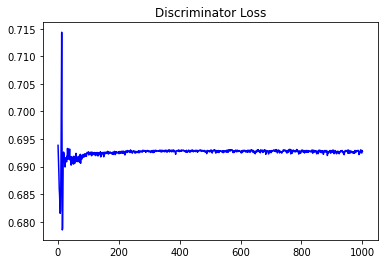

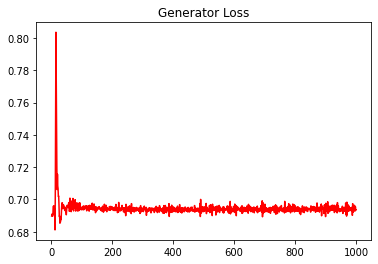

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.032100831233547955


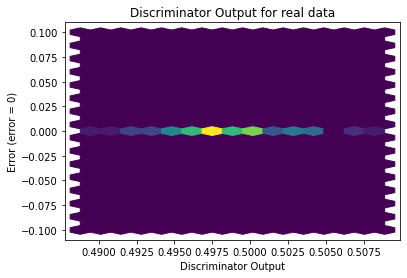

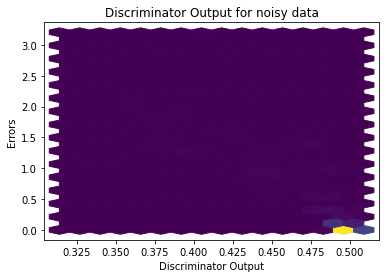

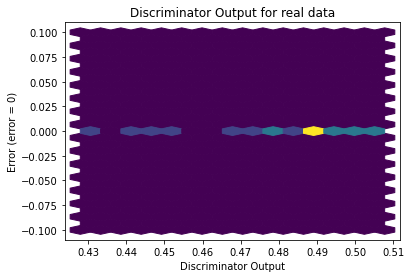

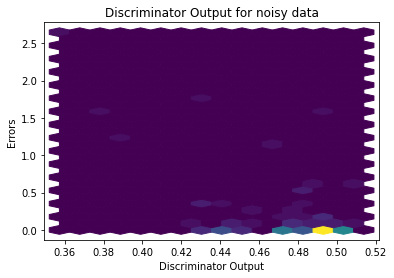

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


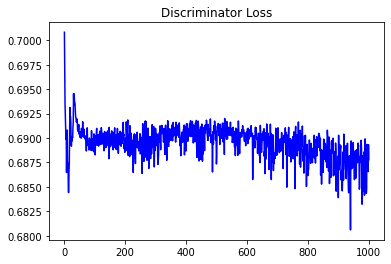

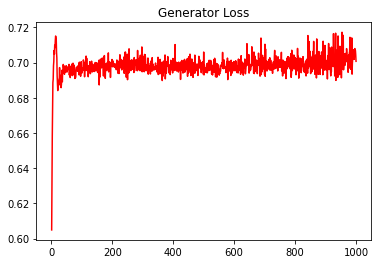

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03545723787749238


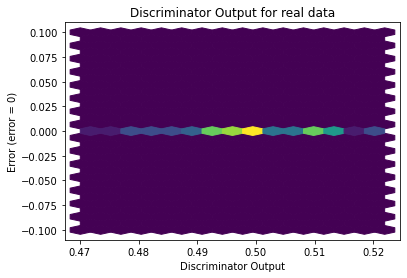

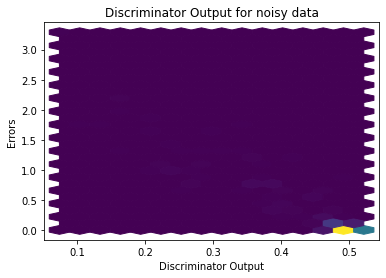

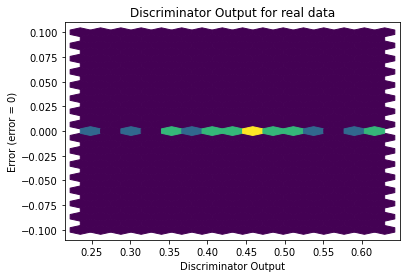

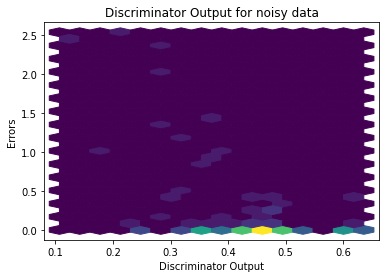

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1211]], requires_grad=True)
